# ML-Driven Road Intelligence: Empowering Machine with Traffic Sign Perception


# Loading Libraries
The model-building process involves essential libraries like NumPy, Pandas, TensorFlow for machine learning tasks. PIL aids image handling, while OS manages files. Seaborn and Matplotlib assist in visualizing data. Keras facilitates neural network creation with Sequential, Conv2D, MaxPool2D, Dense, Flatten, and Dropout layers, crucial for model architecture.

In [1]:
# Importing the Libraries, which are the basic requirement for our MODEL_BUILDING_PROCESS
import numpy as np 
import pandas as pd 
import tensorflow as tf
import pickle
from PIL import Image
import os
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


    

# Construction Sign Recognition Dataset with PIL and NumPy

This cell is crucial for assembling a dataset to train a machine learning model geared for traffic sign recognition. Operating within a loop encompassing 43 classes of traffic signs, it systematically navigates through each class, accessing images stored in respective directories. Utilizing the `os` and `PIL` libraries, it loads these images, ensuring uniform dimensions by resizing them to 32x32 pixels.The images are then converted into NumPy arrays, a requisite format for machine learning models, and normalized to a scale between 0 and 1 to streamline computations. These processed images, stored as NumPy arrays, are appended into the 'Data' list, forming the fundamental dataset for training.

Simultaneously, the associated class labels are assigned to the 'Labels' list, correlating each image with its corresponding traffic sign class. Any exceptions encountered during this process are captured and printed. In essence, this code snippet orchestrates the construction of a comprehensive dataset by compiling images as numerical data ('Data') and their respective class labels ('Labels'), laying the foundation for subsequent machine learning model training and traffic sign recognition.

This code is like a factory gathering pictures of traffic signs to teach a computer how to recognize them. It looks at 43 types of signs, finds their pictures stored in different folders, and adjusts each picture to be the same size. Then it changes these pictures into a language the computer can understand, putting them in a big list called 'Data'. At the same time, it makes another list called 'Labels' that says what kind of sign each picture is. If there's a problem with a picture, it tells us so we can fix it. Overall, it's creating a big set of pictures and labels to teach the computer about traffic signs.

In [3]:
# rak

import os
from PIL import Image
import numpy as np

number_of_classes = 43

Data = []
Labels = [] 


for i in range(number_of_classes):
    current_working_directory = "F:\\Projects\\Traffic_Sign_Recognition"
    path = os.path.join(current_working_directory, 'Train', str(i))
    images = os.listdir(path)
    for j in images:
        try:
            image = Image.open(os.path.join(path, j))  # Using os.path.join for path concatenation
            image = image.resize((32, 32))
            image = np.array(image)
            image = image / 255.0
            Data.append(image)
            Labels.append(i)
        except Exception as e:
            print(e)


cannot identify image file 'F:\\Projects\\Traffic_Sign_Recognition\\Train\\42\\Data.pkl'
cannot identify image file 'F:\\Projects\\Traffic_Sign_Recognition\\Train\\42\\label.pkl'


# Upload 

Storing the 'Data.pkl' and 'label.pkl' files locally allows future access to the meticulously curated traffic sign dataset. By using `pickle` in Python, the `Data` containing processed image data and `Labels` holding corresponding class information are serialized and saved. This facilitates swift reloading of the dataset for model training or evaluation, offering convenience and efficiency in reusing this structured data, crucial for seamless experimentation and model development.

In [ ]:
# Optional

data_path = os.path.join(path,'Data.pkl')
with open(data_path, 'wb') as file:
    pickle.dump(Data, file)
    
label_path = os.path.join(path,'label.pkl')
with open(label_path, 'wb') as file:
    pickle.dump(Labels, file)

# Download

In [ ]:
# Optional
Data_file_path = os.path.join(path,'Data.pkl')
with open(Data_file_path, 'rb') as file:
    Data = pickle.load(file)
    

label_file_path = os.path.join(path,'label.pkl')
with open(label_file_path, 'rb') as file:
    Labels = pickle.load(file)

In [4]:
type(Data) , type(Labels)

(list, list)

In [5]:
Data[0]

array([[[0.29411765, 0.30588235, 0.31372549],
        [0.28627451, 0.29803922, 0.30588235],
        [0.32156863, 0.32941176, 0.3254902 ],
        ...,
        [0.2627451 , 0.29019608, 0.28627451],
        [0.25490196, 0.26666667, 0.2627451 ],
        [0.25882353, 0.2627451 , 0.25882353]],

       [[0.3254902 , 0.32941176, 0.3372549 ],
        [0.30980392, 0.31372549, 0.32156863],
        [0.33333333, 0.3372549 , 0.3254902 ],
        ...,
        [0.28627451, 0.30196078, 0.30196078],
        [0.29803922, 0.30588235, 0.29411765],
        [0.30980392, 0.30980392, 0.30196078]],

       [[0.30980392, 0.30980392, 0.31764706],
        [0.32941176, 0.32941176, 0.33333333],
        [0.3372549 , 0.34117647, 0.34117647],
        ...,
        [0.27843137, 0.29019608, 0.28235294],
        [0.29411765, 0.29019608, 0.2745098 ],
        [0.30980392, 0.30588235, 0.29411765]],

       ...,

       [[0.50196078, 0.50980392, 0.53333333],
        [0.47058824, 0.49019608, 0.51372549],
        [0.42745098, 0


# Array Conversion
Converting 'Data' and 'Labels' to NumPy arrays optimizes memory, enhances computational efficiency, and ensures consistent, array-based data structures, essential for streamlined machine learning workflows and compatibility across diverse libraries.

Basically Think of converting 'Data' and 'Labels' to NumPy arrays like organizing things neatly in labeled boxes for easy access. Instead of having loose items scattered around, putting them in labeled boxes makes it easier to find what you need quickly. Similarly, turning 'Data' (which holds the pictures) and 'Labels' (which tells what each picture is) into NumPy arrays helps organize and streamline them, making it faster and simpler for the computer to work with them when learning about traffic signs.

In [6]:

Data = np.array(Data)

Labels = np.array(Labels)

**********************************

# NumPy File Storage

Storing 'Data' and 'Labels' as NumPy files is like packing your important stuff in labeled boxes and putting them in a safe place. This way, if you need them later, you can easily retrieve them without having to organize everything again. Similarly, by saving the processed pictures ('Data') and their labels ('Labels') as NumPy files, we keep them safe and organized. So, when we want to teach the computer more about traffic signs later, we can quickly bring back these organized pictures and labels, saving us time from redoing all the preparation work.

In [7]:
os.chdir("F:\\Projects\\Traffic_Sign_Recognition\\Preprocessed_Data_&_Labels_&_SAVED_MODEL")

np.save("Data" , Data)
np.save("Labels" , Labels)
Data = np.load('Data.npy')
Labels = np.load('Labels.npy')

*******************************************

# Exceptional or to Check

In [8]:
Data[0]


array([[[0.29411765, 0.30588235, 0.31372549],
        [0.28627451, 0.29803922, 0.30588235],
        [0.32156863, 0.32941176, 0.3254902 ],
        ...,
        [0.2627451 , 0.29019608, 0.28627451],
        [0.25490196, 0.26666667, 0.2627451 ],
        [0.25882353, 0.2627451 , 0.25882353]],

       [[0.3254902 , 0.32941176, 0.3372549 ],
        [0.30980392, 0.31372549, 0.32156863],
        [0.33333333, 0.3372549 , 0.3254902 ],
        ...,
        [0.28627451, 0.30196078, 0.30196078],
        [0.29803922, 0.30588235, 0.29411765],
        [0.30980392, 0.30980392, 0.30196078]],

       [[0.30980392, 0.30980392, 0.31764706],
        [0.32941176, 0.32941176, 0.33333333],
        [0.3372549 , 0.34117647, 0.34117647],
        ...,
        [0.27843137, 0.29019608, 0.28235294],
        [0.29411765, 0.29019608, 0.2745098 ],
        [0.30980392, 0.30588235, 0.29411765]],

       ...,

       [[0.50196078, 0.50980392, 0.53333333],
        [0.47058824, 0.49019608, 0.51372549],
        [0.42745098, 0

In [9]:
Labels[0]

0

In [10]:
Data[1]

array([[[0.29411765, 0.30588235, 0.31372549],
        [0.28627451, 0.29803922, 0.30588235],
        [0.32156863, 0.32941176, 0.3254902 ],
        ...,
        [0.2627451 , 0.29019608, 0.28627451],
        [0.25490196, 0.26666667, 0.2627451 ],
        [0.25882353, 0.2627451 , 0.25882353]],

       [[0.3254902 , 0.32941176, 0.3372549 ],
        [0.30980392, 0.31372549, 0.32156863],
        [0.33333333, 0.3372549 , 0.3254902 ],
        ...,
        [0.28627451, 0.30196078, 0.30196078],
        [0.29803922, 0.30588235, 0.29411765],
        [0.30980392, 0.30980392, 0.30196078]],

       [[0.30980392, 0.30980392, 0.31764706],
        [0.32941176, 0.32941176, 0.33333333],
        [0.3372549 , 0.34117647, 0.34117647],
        ...,
        [0.27843137, 0.29019608, 0.28235294],
        [0.29411765, 0.29019608, 0.2745098 ],
        [0.30980392, 0.30588235, 0.29411765]],

       ...,

       [[0.50196078, 0.50980392, 0.53333333],
        [0.47058824, 0.49019608, 0.51372549],
        [0.42745098, 0

In [11]:
Labels[1]

0

In [12]:
Labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [16]:
print(f" Data Shape : {Data.shape}\n Labels Shape :{Labels.shape}")


 Data Shape : (78418, 32, 32, 3)
 Labels Shape :(78418,)


*******************************************

# Train

The 'train_test_split' function from Scikit-Learn is a pivotal tool for partitioning datasets into distinct subsets, serving a crucial role in model development, validation, and assessment within machine learning workflows. In this instance, the 'Data' and 'Labels' are split into 'X_train' and 'Y_train' for training, and 'X_test' and 'Y_test' for testing, allocating 70% of the data for training and 30% for testing. This division ensures a fair representation of the dataset in both training and testing phases, mitigating biases and enhancing the model's generalizability.

For instance, let's consider the shapes of the resulting subsets:
- 'X_train' holds a portion of the original 'Data' array, used to train the machine learning model. Its shape confirms the 70% allocation for training.
- 'X_test' contains the remaining portion of 'Data', constituting the testing dataset. Its shape validates the 30% allocation for testing.
- 'Y_train' and 'Y_test' correspondingly hold the labels corresponding to 'X_train' and 'X_test', ensuring alignment between inputs and outputs for model training and evaluation.

This split facilitates model training on diverse data while reserving a separate, unseen portion for evaluating its performance. By incorporating a 'random_state' parameter, reproducibility is ensured, allowing consistent outcomes in repeated executions.
The 'train_test_split' outcome aids in robust model development, allowing iterative enhancements and unbiased assessment of machine learning models by segregating data for learning and testing.


**In simple words!** Imagine you have a big collection of pictures to teach a computer. This function is like dividing these pictures into two parts: one for teaching and one for testing how well it learned. It's like having separate sets of puzzles—one to practice with and another to test how good you've become.

Here, 70% of the pictures are used for teaching ('X_train'), and the remaining 30% are kept aside for testing ('X_test'). The labels, which say what each picture is ('Y_train' and 'Y_test'), also get split in the same way as the pictures. This way, the computer can learn from one set and check how well it learned using another set it hasn't seen before. This helps ensure the computer learns properly and can recognize new pictures accurately too!

In [17]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(Data , Labels , test_size = 0.30 , random_state = 0)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {Y_test.shape}")

X_train shape: (54892, 32, 32, 3)
X_test shape: (23526, 32, 32, 3)
Y_train shape: (54892,)
X_test shape: (23526,)


The below cell utilizes one-hot encoding, an essential preprocessing step in machine learning when dealing with categorical data like class labels. In this context, the 'Y_train' and 'Y_test' labels, representing traffic sign classes, are transformed into binary matrices using Keras' 'to_categorical' function. For instance, if we initially had a label 'Y_train' with values ranging from 0 to 42 (indicating 43 different classes of traffic signs), the one-hot encoding converts these labels into binary vectors. Each vector is of length 43, where a '1' is positioned at the index corresponding to the label value and '0's elsewhere. This conversion enables neural networks to better understand and learn from categorical data, as it aligns with the network's output structure.

The 'print' statements confirm the successful transformation by displaying the shapes of 'X_train', 'X_test', 'Y_train', and 'Y_test'. The shapes reveal the number of samples and the dimensions of the binary matrices—essential information for designing neural network architectures.Ultimately, this preprocessing step ensures that the neural network's output layer, particularly in classification tasks, aligns with the number of classes and is formatted appropriately for training. By encoding categorical labels into a binary format, the neural network can effectively learn and predict the correct traffic sign classes during training and testing phases.

Absolutely! Imagine you have different types of fruits to teach someone. To make it easier for them to learn, you'd use special codes for each fruit. For example, if '1' means apple, '2' means banana, and so on.
Here, we're doing something similar with traffic signs. Instead of saying "this is sign number 1, this is sign number 2," we're converting these numbers into special codes, almost like secret messages for the computer to understand better.

For instance, if we had labels from 0 to 42 (for 43 different signs), we convert these labels into special codes. Each code looks like a row of 43 numbers, where only one number is '1' (like a secret signal) and the rest are '0's. This way, the computer knows exactly which sign we're talking about.
The 'print' statements just show how many codes (rows) and how many numbers (columns) there are in these secret messages. It's like telling us how many types of signs the computer is learning about and how it's organizing that information, making sure it's all set up for the computer to learn from it properly.

In [18]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {Y_test.shape}")

print("\nX_test Shape : ",X_train.shape[1:4])

X_train shape: (54892, 32, 32, 3)
X_test shape: (23526, 32, 32, 3)
Y_train shape: (54892, 43)
X_test shape: (23526, 43)

X_test Shape :  (32, 32, 3)


# Model Alteration

This code defines a convolutional neural network (CNN) architecture using Keras' Sequential model for traffic sign recognition. CNNs are well-suited for image classification tasks due to their ability to capture spatial hierarchies in data.

The model comprises multiple layers:
- **Convolutional Layers:** The first layer applies 32 filters of size 5x5 to the input images, extracting features through convolutions, followed by a 2x2 MaxPooling layer to reduce spatial dimensions, aiding in feature extraction.
- Subsequent convolutional layers, with 64 filters of size 3x3 each, further extract intricate features, enhancing the network's ability to identify complex patterns in the images. Each is followed by MaxPooling to downsample and retain essential information.

The 'Flatten' layer converts the 2D feature maps into a 1D array, preparing the data for fully connected layers.
- **Dense Layers:** Two dense layers with 256 and 128 neurons, respectively, leverage 'relu' activation functions to introduce non-linearity, enhancing the model's capacity to learn complex relationships in the data.
- 'Dropout' layers with 25% and 20% dropout rates mitigate overfitting by randomly deactivating neurons during training, promoting robustness and generalization.

- **Output Layer:** The final dense layer comprises 43 neurons (equal to the number of traffic sign classes) using 'softmax' activation, yielding class probabilities for multi-class classification.

This architecture's depth and complexity facilitate hierarchical feature extraction, enabling the model to discern intricate patterns in traffic signs for accurate classification. It's designed to balance model complexity and generalizability, crucial for effective traffic sign recognition in diverse scenarios.

Imagine this brain has different layers:

* First Layers: It looks at the pictures and tries to spot basic shapes and patterns, like lines or edges.
* Next Layers: It digs deeper and finds more complicated details, like specific shapes or unique parts of the signs.
* Flatten Layer: It organizes all these details neatly for the brain to understand better.
* More Layers: It thinks harder, trying to understand more complex things about the signs.
* Final Layer: It makes the final decision, saying which traffic sign it thinks is in the picture.

By doing all this, the brain can learn lots of things about traffic signs and figure out which sign is in a picture, just like you can recognize different signs when you're driving. It's built to be smart enough to tell different signs apart but also not too complicated to confuse itself.


In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.20))


model.add(Dense(43, activation='softmax'))

# Compile and Fit

The 'compile' function defines how the model learns by setting up essential components: the loss function measures how 'wrong' the model's predictions are, 'adam' optimizer adjusts the model's 'guesses' to minimize errors, and 'accuracy' assesses correctness during training. The 'TensorBoard' callback creates visual logs for model analysis, recording details like error rates and weight changes, aiding in understanding the model's learning process.

The 'fit' function trains the model using the training data ('X_train' and 'Y_train'). It divides the data into smaller 'batches' (32 samples per batch) and runs through the entire dataset ('epochs') 40 times, tweaking itself to improve accuracy. It also checks its progress on unseen data ('validation_split=0.3'), ensuring it's not just memorizing but understanding. The 'history_of_model' keeps track of how the model learns at each step, allowing us to see how well it's improving after each training round. This comprehensive approach ensures the model learns effectively, improving its ability to recognize traffic signs accurately.

********************************************

First, we set up the way it learns and figures out if it's doing well or not. It's like telling the computer how to know when it's making mistakes and how to fix them.

Then comes the actual learning part. It's similar to practicing the puzzle many times. The computer takes small groups of the puzzle pieces (we call them 'batches') and tries to fit them together correctly. It repeats this process 40 times, getting better each time it practices. But it's not just practicing the same puzzle over and over; it also checks if it's getting better at solving new, unseen puzzles. This way, it's not just memorizing the solution but truly understanding how to solve puzzles. The computer keeps a journal ('history_of_model') of how it's improving, like notes on how well it's doing and where it needs to work harder. This way, it gets better at recognizing traffic signs accurately!

In [20]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [21]:
#Fitting of the model
history__of__model = model.fit(X_train, Y_train, batch_size=32, epochs=40, validation_split=0.3, callbacks= [tb_callback])

Epoch 1/40


1201/1201 [==============================] - 36s 28ms/step - loss: 1.2847 - accuracy: 0.6225 - val_loss: 0.2148 - val_accuracy: 0.9385
Epoch 2/40
1201/1201 [==============================] - 38s 32ms/step - loss: 0.1705 - accuracy: 0.9494 - val_loss: 0.0860 - val_accuracy: 0.9775
Epoch 3/40
1201/1201 [==============================] - 34s 29ms/step - loss: 0.0916 - accuracy: 0.9721 - val_loss: 0.0646 - val_accuracy: 0.9827
Epoch 4/40
1201/1201 [==============================] - 38s 32ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.0483 - val_accuracy: 0.9875
Epoch 5/40
1201/1201 [==============================] - 36s 30ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.0715 - val_accuracy: 0.9810
Epoch 6/40
1201/1201 [==============================] - 36s 30ms/step - loss: 0.0438 - accuracy: 0.9875 - val_loss: 0.0289 - val_accuracy: 0.9926
Epoch 7/40
1201/1201 [==============================] - 42s 35ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0351

In [22]:
model_path = "F:\\Projects\\Traffic_Sign_Recognition\\saved_models\\model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model,file)
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

************************

   #                          Load Existing Model

In [25]:
# Optional

import pickle
path = "F:\\Projects\\Traffic_Sign_Recognition\\Preprocessed_Data_&_Labels_&_SAVED_MODEL\\model.pkl"

# Load the model from the file
with open(path, 'rb') as file:
    model = pickle.load(file)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [ ]:
loaded_model.summary()
model = loaded_model

In [ ]:
model.summary()

In [29]:
model.evaluate(X_test , Y_test)

736/736 [==============================] - 7s 9ms/step - loss: 3.7655 - accuracy: 0.0051


[3.765549659729004, 0.005058233626186848]

***********************************

# Graph and Vizualisation


This graph displays the model's learning progress over epochs. The red line shows how well the model learns on training data, while the green line indicates its performance on unseen validation data. As epochs increase, we see if the model gets better at recognizing traffic signs. If both lines rise together, the model learns well without overfitting. Any divergence might indicate overfitting or underfitting, helping us adjust the model for better accuracy.

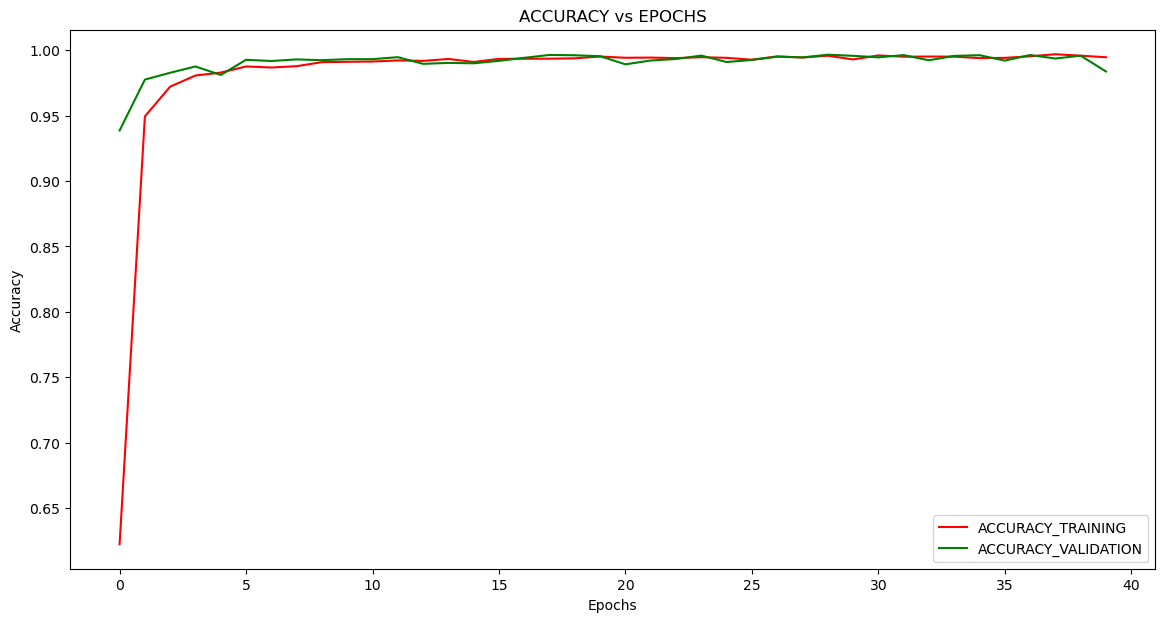

In [30]:
"PLOTTING ACCURACY GRAPH"
                # length , Height
plt.figure(figsize=(14,7)) 
plt.plot(history__of__model.history['accuracy'],'r-' ,label='ACCURACY_TRAINING' )
plt.plot(history__of__model.history['val_accuracy'] , 'g-', label='ACCURACY_VALIDATION')
plt.title('ACCURACY vs EPOCHS')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This graph illustrates how well the model learns and generalizes over epochs. The red line depicts the training loss, indicating how much the model's predictions deviate from the actual values during training. Simultaneously, the green line portrays the validation loss, showing its performance on unseen data. A decrease in both lines indicates improved learning. If the training loss drops while the validation loss increases, it signals overfitting—a situation where the model memorizes rather than comprehends, aiding in fine-tuning the model for better generalization.

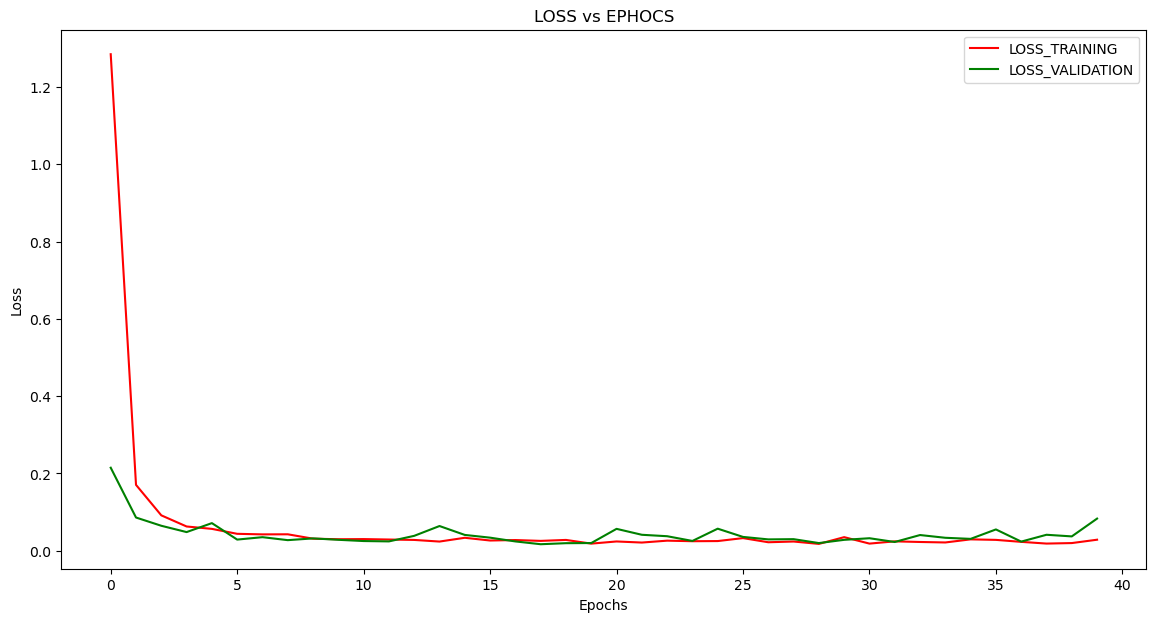

In [31]:
# Plotting Loss Graph
                # length , Height
plt.figure(figsize=(14,7))
plt.plot(history__of__model.history['loss'], 'r-' , label='LOSS_TRAINING')
plt.plot(history__of__model.history['val_loss'], 'g-' ,label='LOSS_VALIDATION')
plt.title('LOSS vs EPHOCS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**************************

# Prediction 

The code uses the trained model to predict the types of traffic signs in the 'X_test' dataset. For each image in 'X_test', the model estimates the probabilities of it belonging to each of the 43 possible traffic sign classes. 

The 'np.argmax()' function helps in finding the class with the highest probability predicted by the model for each image. It looks at the list of probabilities and chooses the index (or class) that has the highest likelihood according to the model. This way, 'yyyy_pred' contains the predicted class for each image in the 'X_test' dataset.

**For easy understanding** Imagine you have a friend who's really good at guessing what things are in pictures. They look at different pictures of animals and try to guess which animal it is. They might say, "I think it's a dog," "Maybe it's a cat," or "It looks like a bird."

Now, the 'np.argmax()' is like your friend trying to pick the most likely animal they think is in each picture. They look at all the animals they know and pick the one they think is most probable for each picture. For example, if they're very sure it's a dog, they'll say, "It's definitely a dog!"

Similarly, the code makes the computer guess what traffic sign is in each picture by picking the one it thinks is most likely, based on all the signs it knows. This helps the computer make its best guess about each picture in the 'X_test' set.

In [32]:
yyyy___pred = np.argmax(model.predict(X_test), axis=-1)

736/736 [==============================] - 6s 9ms/step


In [33]:
yyyy___pred

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

# Testing & Test Model load (O)

This 'model_testing' function aims to prepare the test dataset for the traffic sign recognition model. It starts by reading a CSV file ('Test.csv') containing information about test images, including file paths and corresponding class labels. 

The function then reads this CSV file using Pandas ('pd.read_csv(testcsv)'), extracting the class labels ('label') and file paths ('imgs') from the CSV columns.

Next, it iterates through each image file path in 'imgs', opens the image using the 'Image' module from PIL, and resizes each image to a standard 32x32 pixel size. These processed images are converted to NumPy arrays and normalized ('X_test = X_test / 255.0') to ensure consistency and compatibility with the model.

Finally, the function returns two essential components:
- 'X_test': A NumPy array containing the preprocessed test images that the model will predict on.
- 'label': An array containing the actual class labels corresponding to each test image, which helps evaluate the model's accuracy by comparing its predictions with the true labels.

In [ ]:
# TESTING THE MODEL THAT WE HAV BUILT ON THE TEST DATA.

def model_testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((32,32))
        data.append(np.array(image))
    X_test=np.array(data)
    X_test = X_test / 255.0
    return X_test,label

In [ ]:
os.chdir("F:\Projects\Traffic_Sign_Recognition")
X_test, label = model_testing("Test.csv") 




In [ ]:
# Optional, It's saving X-test and Label

X_test_path = "F:\\Projects\\Traffic_Sign_Recognition\\saved_models\\axis\\X_test.pkl"
label_path = "F:\\Projects\\Traffic_Sign_Recognition\\saved_models\\axis\\label.pkl"
# Load the model from the file

with open(X_test_path, 'wb') as file:
    pickle.dump(X_test,file)
    
with open(label_path, 'wb') as file:
    pickle.dump(label,file)

In [34]:
# Optional, It's loading X-test and Label from pre- saved files

import pickle
X_test_path = "F:\\Projects\\Traffic_Sign_Recognition\\saved_models\\axis\\X_test.pkl"
label_path = "F:\\Projects\\Traffic_Sign_Recognition\\saved_models\\axis\\label.pkl"
# Load the model from the file

with open(X_test_path, 'rb') as file:
    X_test = pickle.load(file)
    
with open(label_path, 'rb') as file:
    label = pickle.load(file)
    


****************************

# Class predication

The cell predicts the classes of traffic signs for the test dataset ('X_test') using a trained machine learning model.

- 'model.predict(X_test)': Utilizes the trained model to make predictions for each image in the test dataset. It generates a matrix where each row represents an image, and the columns contain probabilities for all possible traffic sign classes.

- 'np.argmax()': This function identifies the indices (or classes) with the highest probabilities along each row (image) in the prediction matrix. The 'axis=-1' parameter specifies that this should be done along the last axis, effectively choosing the class with the maximum probability for each image.

The result ('Y_pred') is an array containing the predicted classes for each test image based on the model's estimations of the highest-probability traffic sign class for each image in 'X_test'.

In [35]:
Y_pred = np.argmax(model.predict(X_test) , axis = -1)

395/395 [==============================] - 3s 8ms/step


In [36]:
Y_pred 

array([6, 6, 0, ..., 6, 6, 0], dtype=int64)

********************************

# Test Accuracy 

Certainly! These lines of code evaluate how well our model performed in predicting traffic sign classes by comparing its predictions ('Y_pred') with the actual classes ('label').

- **Accuracy Score:** It calculates the accuracy of the model's predictions by comparing the predicted classes with the actual classes and determining the percentage of correct predictions out of the total number of predictions.

- **Confusion Matrix:** This matrix is a table that showcases the model's performance by comparing predicted classes against the actual classes. It provides insights into the types of errors the model made, such as misclassifications or confusion between specific classes.

- **Classification Report:** It presents a comprehensive summary of the model's performance, including precision, recall, and F1-score for each class. Precision indicates how many selected items were relevant, recall indicates how many relevant items were selected, and the F1-score combines both precision and recall into a single metric.

Printing these metrics ('Accuracy', 'Confusion Matrix', and 'Classification Report') helps us understand how well our model performed in recognizing different traffic sign classes and where it might need improvement.

In [37]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

acc = accuracy_score(label, Y_pred)*100
cm = confusion_matrix(label, Y_pred)
cr = classification_report(label, Y_pred)

print(f"Accuracy : {acc}%")
print(f"Confusion Matrix :\n{cm}")
print(f"Classification Report :\n{cr}")

Accuracy : 0.5146476642913698%
Confusion Matrix :
[[ 7  0  0 ...  0  0  0]
 [86  0  0 ...  0  0  0]
 [67  0  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [45  0  0 ...  0  0  0]
 [63  0  0 ...  0  0  0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.12      0.00        60
           1       0.00      0.00      0.00       720
           2       0.00      0.00      0.00       750
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00       660
           5       0.00      0.00      0.00       630
           6       0.01      0.38      0.01       150
           7       0.00      0.00      0.00       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.00      0.00      0.00       420
          12       0.00      0.00      0.00       690
          13 

C:\Users\Raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Visual representation of the confusion matrix. Each square in the heatmap represents how often the model confused one traffic sign for another. The numbers inside the squares show these counts. A darker color indicates more frequent confusion between those particular signs. This visual helps us identify which signs the model might struggle to distinguish, aiding in understanding its performance on different traffic sign classes.

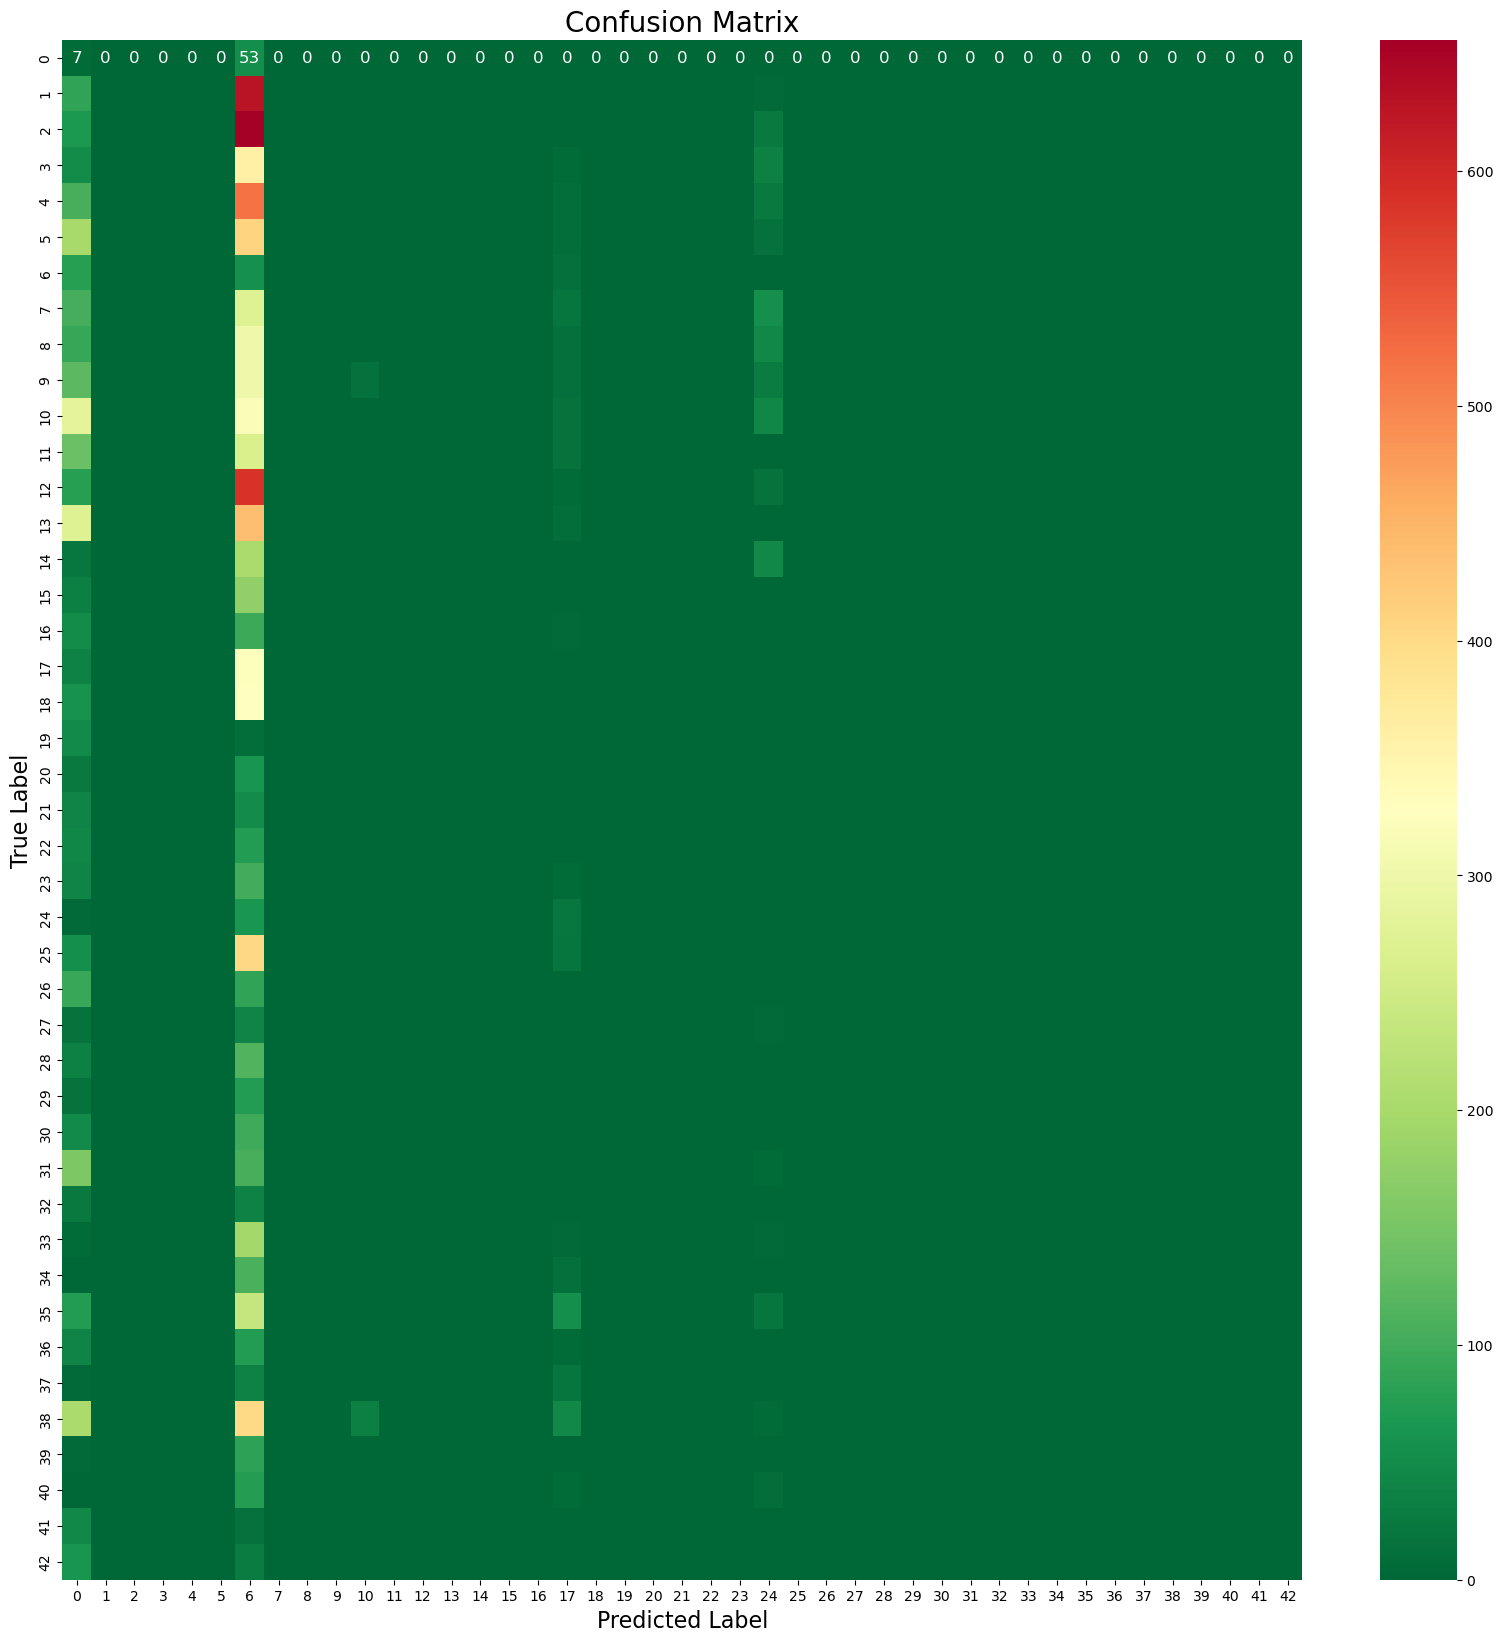

In [42]:
plt.figure(figsize=(20,20))
sb.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', annot_kws={"size": 12}, xticklabels=range(43), yticklabels=range(43))
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()


************************************************


# Train model for future use and load another pre-existing model

1. **Model Saving:** The model trained on traffic sign data is saved using the 'model.save()' function. It's stored with the filename 'my_model.keras' in the directory specified by 'os.chdir()' (the directory path: "F:\\Projects\\Traffic_Sign_Recognition\\Preprocessed_Data_&_Labels_&_SAVED_MODEL").

2. **Model Loading:** Another pre-trained model ('R_G_B_model.h5') is loaded into the 'model' variable using 'load_model()' from Keras. This model might have been trained differently or on different data.

3. **Classes Dictionary:** The 'classes' dictionary maps numeric labels to their corresponding traffic sign descriptions. Each numeric key (0 to 42) represents a specific traffic sign class, and its corresponding value holds the textual description of that traffic sign.

This code segment helps store a trained model for future use and loads another pre-existing model while providing a dictionary to interpret the numeric predictions made by the model into human-readable traffic sign descriptions.

In [44]:
os.chdir("F:\\Projects\\Traffic_Sign_Recognition\\Preprocessed_Data_&_Labels_&_SAVED_MODEL")
model.save('my_model.keras')
model = load_model("R_G_B_model.h5")


classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

Function 'testing_image' that performs testing on a single image for traffic sign recognition. Here's what each part of the function does:

1. **Changing Directory:** `os.chdir("F:\\Projects\\Traffic_Sign_Recognition")`: Sets the current working directory to "F:\\Projects\\Traffic_Sign_Recognition".

2. **Function Definition:** `def testing_image(img):`: Defines a function named 'testing_image' that takes a single argument 'img', representing the file path of an image.

3. **Image Processing:**
   - Opens the image using the 'Image' module from PIL: `image = Image.open(img)`.
   - Resizes the image to a standard 32x32 pixels: `image = image.resize((32,32))`.
   - Converts the image to a NumPy array and appends it to the 'data' list: `data.append(np.array(image))`.
   - Converts the 'data' list to a NumPy array and normalizes its values to be between 0 and 1: `X_test = X_test / 255.0`.

4. **Prediction:**
   - Uses the 'model' (which should be pre-loaded) to predict the class of the test image: `Y_pred = np.argmax(model.predict(X_test), axis=-1)`.
   - Returns the original image and the predicted class ('Y_pred').

In essence, this function prepares an image for testing by resizing and formatting it appropriately, uses a pre-loaded model to predict the traffic sign class in the image, and returns both the processed image and the predicted class for analysis or display purposes.

In [45]:
os.chdir("F:\\Projects\\Traffic_Sign_Recognition")

def testing_image(img):
    data=[]
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
    X_test=np.array(data)
    X_test = X_test / 255.0
    Y_pred = np.argmax(model.predict(X_test) , axis=-1)
    return image,Y_pred

Cell randomly select an image from the given directory, perform testing using the 'testing_image' function previously defined, and then display the predicted traffic sign along with the randomly chosen image. Here's a breakdown:

1. **Importing Libraries:** Import necessary libraries, including 'os' for file operations and 'random' for random selection.

2. **Directory Path and File Selection:**
   - `directory_path = 'F:\\Projects\\Traffic_Sign_Recognition\\Test'`: Specifies the directory path where the test images are located.
   - `files = os.listdir(directory_path)`: Retrieves the list of files in the specified directory.
   - `png_files = [file for file in files if file.lower().endswith('.png')]`: Filters out only PNG files from the directory.
   - `random_file = random.choice(png_files)`: Randomly selects a PNG file from the filtered list.

3. **Image Testing:**
   - `test_img = os.path.join(directory_path, random_file)`: Forms the complete file path of the randomly selected image.
   - `plot, prediction = testing_image(test_img)`: Utilizes the 'testing_image' function to process and predict the traffic sign class for the selected image.

4. **Displaying Prediction:**
   - `s = [str(i) for i in prediction]`: Converts the predicted class (which is an array) to a list of strings.
   - `a = int("".join(s))`: Joins the list of strings into a single string and converts it to an integer.
   - `print("Predicted traffic sign is: ", classes[a])`: Maps the predicted integer to its corresponding traffic sign description using the 'classes' dictionary.
   - `plt.imshow(plot)`: Displays the selected image.
   - `plt.show()`: Shows the plotted image along with the predicted traffic sign.

Overall, this code randomly selects a test image, predicts the traffic sign class using a pre-trained model, and displays both the image and the predicted traffic sign description for visual verification.

1/1 [==============================] - 0s 226ms/step
Predicted traffic sign is:  Speed limit (50km/h)


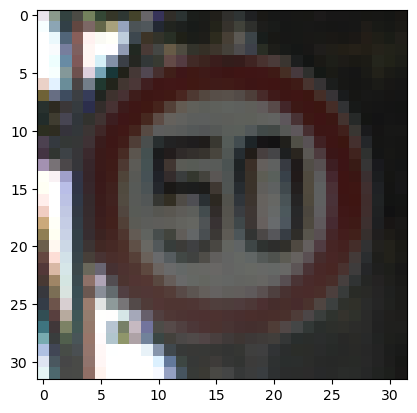

In [46]:
import os
import random
directory_path = 'F:\\Projects\\Traffic_Sign_Recognition\\Test'

files = os.listdir(directory_path)
png_files = [file for file in files if file.lower().endswith('.png')]
random_file = random.choice(png_files)
test_img = os.path.join(directory_path, random_file)
#test_img = os.path.join(directory_path, '12250.png')
plot,prediction = testing_image(test_img)
#prediction = testing_image(test_img)
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()